In [4]:
# Import Library
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
import os

import warnings
warnings.filterwarnings("ignore")

In [5]:
#Get our training and test data
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [6]:
#Inspect our training data
train.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       203       202  
1       175       103       135       149  
2       198       195       194       195  
3       225       222       229       163  
4       157       163       164       179  

[5 rows x 785 columns]

In [7]:
#Get our training labels
labels = train['label'].values

In [8]:
#View the unique labels, 24 in total (no 9)
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:ylabel='count'>

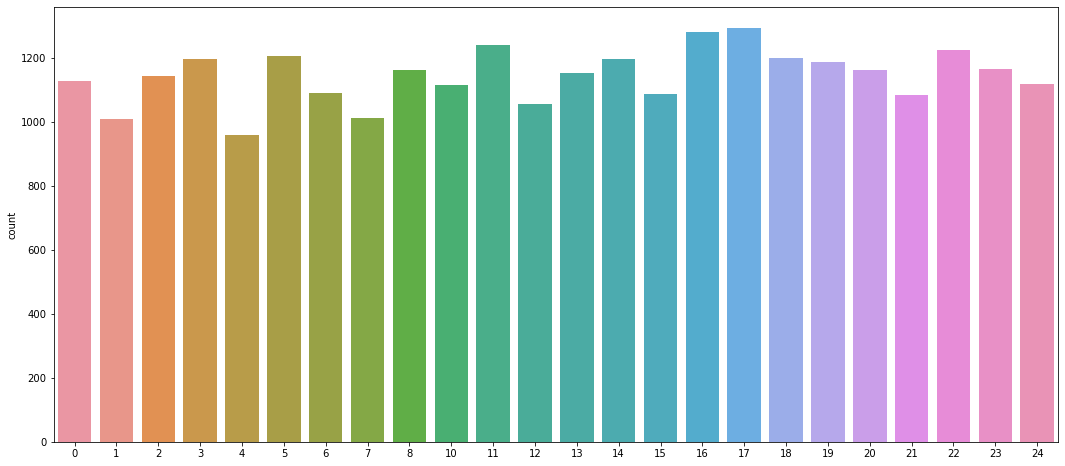

In [9]:
#Plot the quantities in each class
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [10]:
#Drop training labels from our training data so we can separate it
train.drop('label', axis = 1, inplace = True)

In [11]:
#Extract the image data from each row in our csv, remember it's in a row of 748 colums
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])